# QAOA-MC libraryのテスト

## import

In [2]:
import numpy as np
import scipy
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager
import time
import IProgress
from tqdm.notebook import tqdm
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from qulacs import QuantumState
from skqulacs.circuit import LearningCircuit
import qulacsvis as qvis

import made
from made import MADE
import mcmc_function as mcmc
import ising_model as ising
from ising_model import Ising_model
import QAOA_function as qaoa
from QAOA_function import QAOA_ansatz
import qaoa_mc

plt.rcParams["font.family"] = "Helvetica Neue"
plt.rcParams['mathtext.fontset'] = 'cm'

seed = 1514
rng = np.random.default_rng(seed)

## インスタンス設定

In [3]:
n_spin = 8
instance = Ising_model(n_spin, rng, type='SK')

## 回路テスト

In [4]:
depth = 10
ansatz = qaoa_mc.QAOA_circuit(n_spin, instance, depth)
para = [rng.uniform(0.0, 0.3)] * ansatz.get_parameter_count()
print(para)
ansatz.set_parameter(para)

qulacs_circuit = ansatz.get_qulacs_circuit()
#qvis.circuit_drawer(qulacs_circuit, output_method='mpl')

[0.20027480301078363, 0.20027480301078363, 0.20027480301078363, 0.20027480301078363, 0.20027480301078363, 0.20027480301078363, 0.20027480301078363, 0.20027480301078363, 0.20027480301078363, 0.20027480301078363]


## AR テスト

### 計算

In [5]:
beta = 5.0

# exact
cost_ext = qaoa_mc.cost_function(ansatz, instance, beta, mode='exact')
print(cost_ext)

# mcmc sample
n_iter_list = np.arange(4, 2**n_spin, 4)
cost_mcmc = np.zeros(n_iter_list.shape[0])

for i in tqdm(range(n_iter_list.shape[0])):
	n_iter = n_iter_list[i]
	cost_mcmc[i] = qaoa_mc.cost_function(ansatz, instance, beta, mode='mcmc', n_iter=n_iter)

0.07427751697453616


  0%|          | 0/63 [00:00<?, ?it/s]

### 結果plot

0.07427751697453616
[0.00178434 0.37528369 0.49982051 0.19445316 0.42538878 0.23934552
 0.33334981 0.27195242 0.17855878 0.18263351 0.25700344 0.16850782
 0.23603649 0.08801997 0.16734965 0.11979895 0.18843356 0.1020478
 0.11842267 0.15445903 0.15437971 0.21110629 0.09893375 0.08092726
 0.10495593 0.15447252 0.04989267 0.11691245 0.0977581  0.11952031
 0.14275768 0.09409088 0.12349161 0.10752739 0.13526888 0.1267531
 0.12632076 0.08063261 0.07833683 0.12621489 0.10265784 0.08115956
 0.08583453 0.09946003 0.10922761 0.12453803 0.07241963 0.05472622
 0.11386736 0.15827391 0.11141931 0.07924829 0.11822076 0.07987952
 0.1096838  0.08866815 0.10041015 0.07772313 0.16802477 0.09693646
 0.11663909 0.09325336 0.09012222]


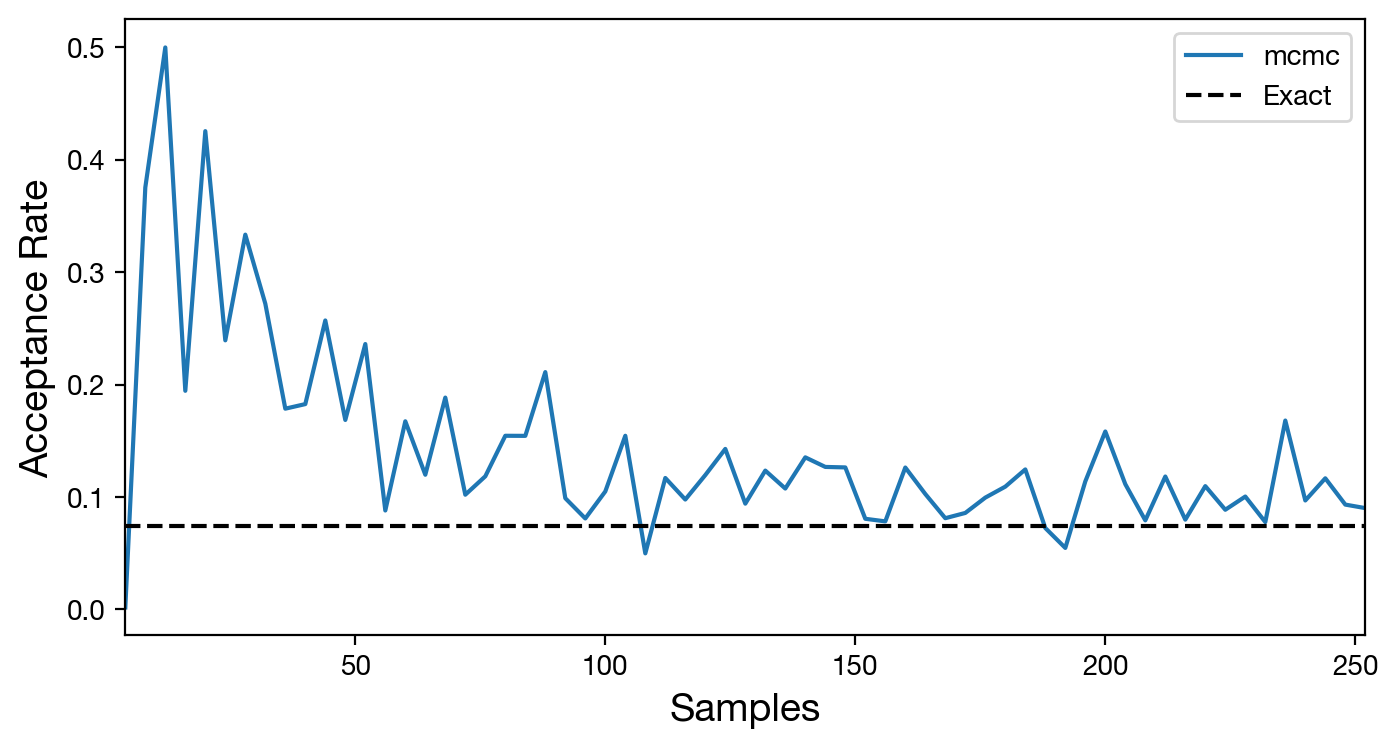

In [6]:
fig1, ax1 = plt.subplots(figsize=(8,4), dpi=200)
ax1.plot(n_iter_list, cost_mcmc, label='mcmc')
ax1.axhline(cost_ext, linestyle='--', color='black', label='Exact')
ax1.set_xlim(n_iter_list[0], n_iter_list[-1])
ax1.set_xlabel("Samples", fontsize=14)
ax1.set_ylabel("Acceptance Rate", fontsize=14)
ax1.legend()

print(cost_ext)
print(cost_mcmc)